- Apply DBSCAN to the heart disease data by trying different values for eps and min_samples parameters. You'll realize that it's really hard to get a two cluster solution using DBSCAN if not impossible.
- Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?
- Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

#upload the dataset
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

heart_df = pd.read_sql_query('select * from heartdisease',con=engine)

engine.dispose()

In [3]:
# Define the features and the outcome
X = heart_df.iloc[:, :13]
y = heart_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

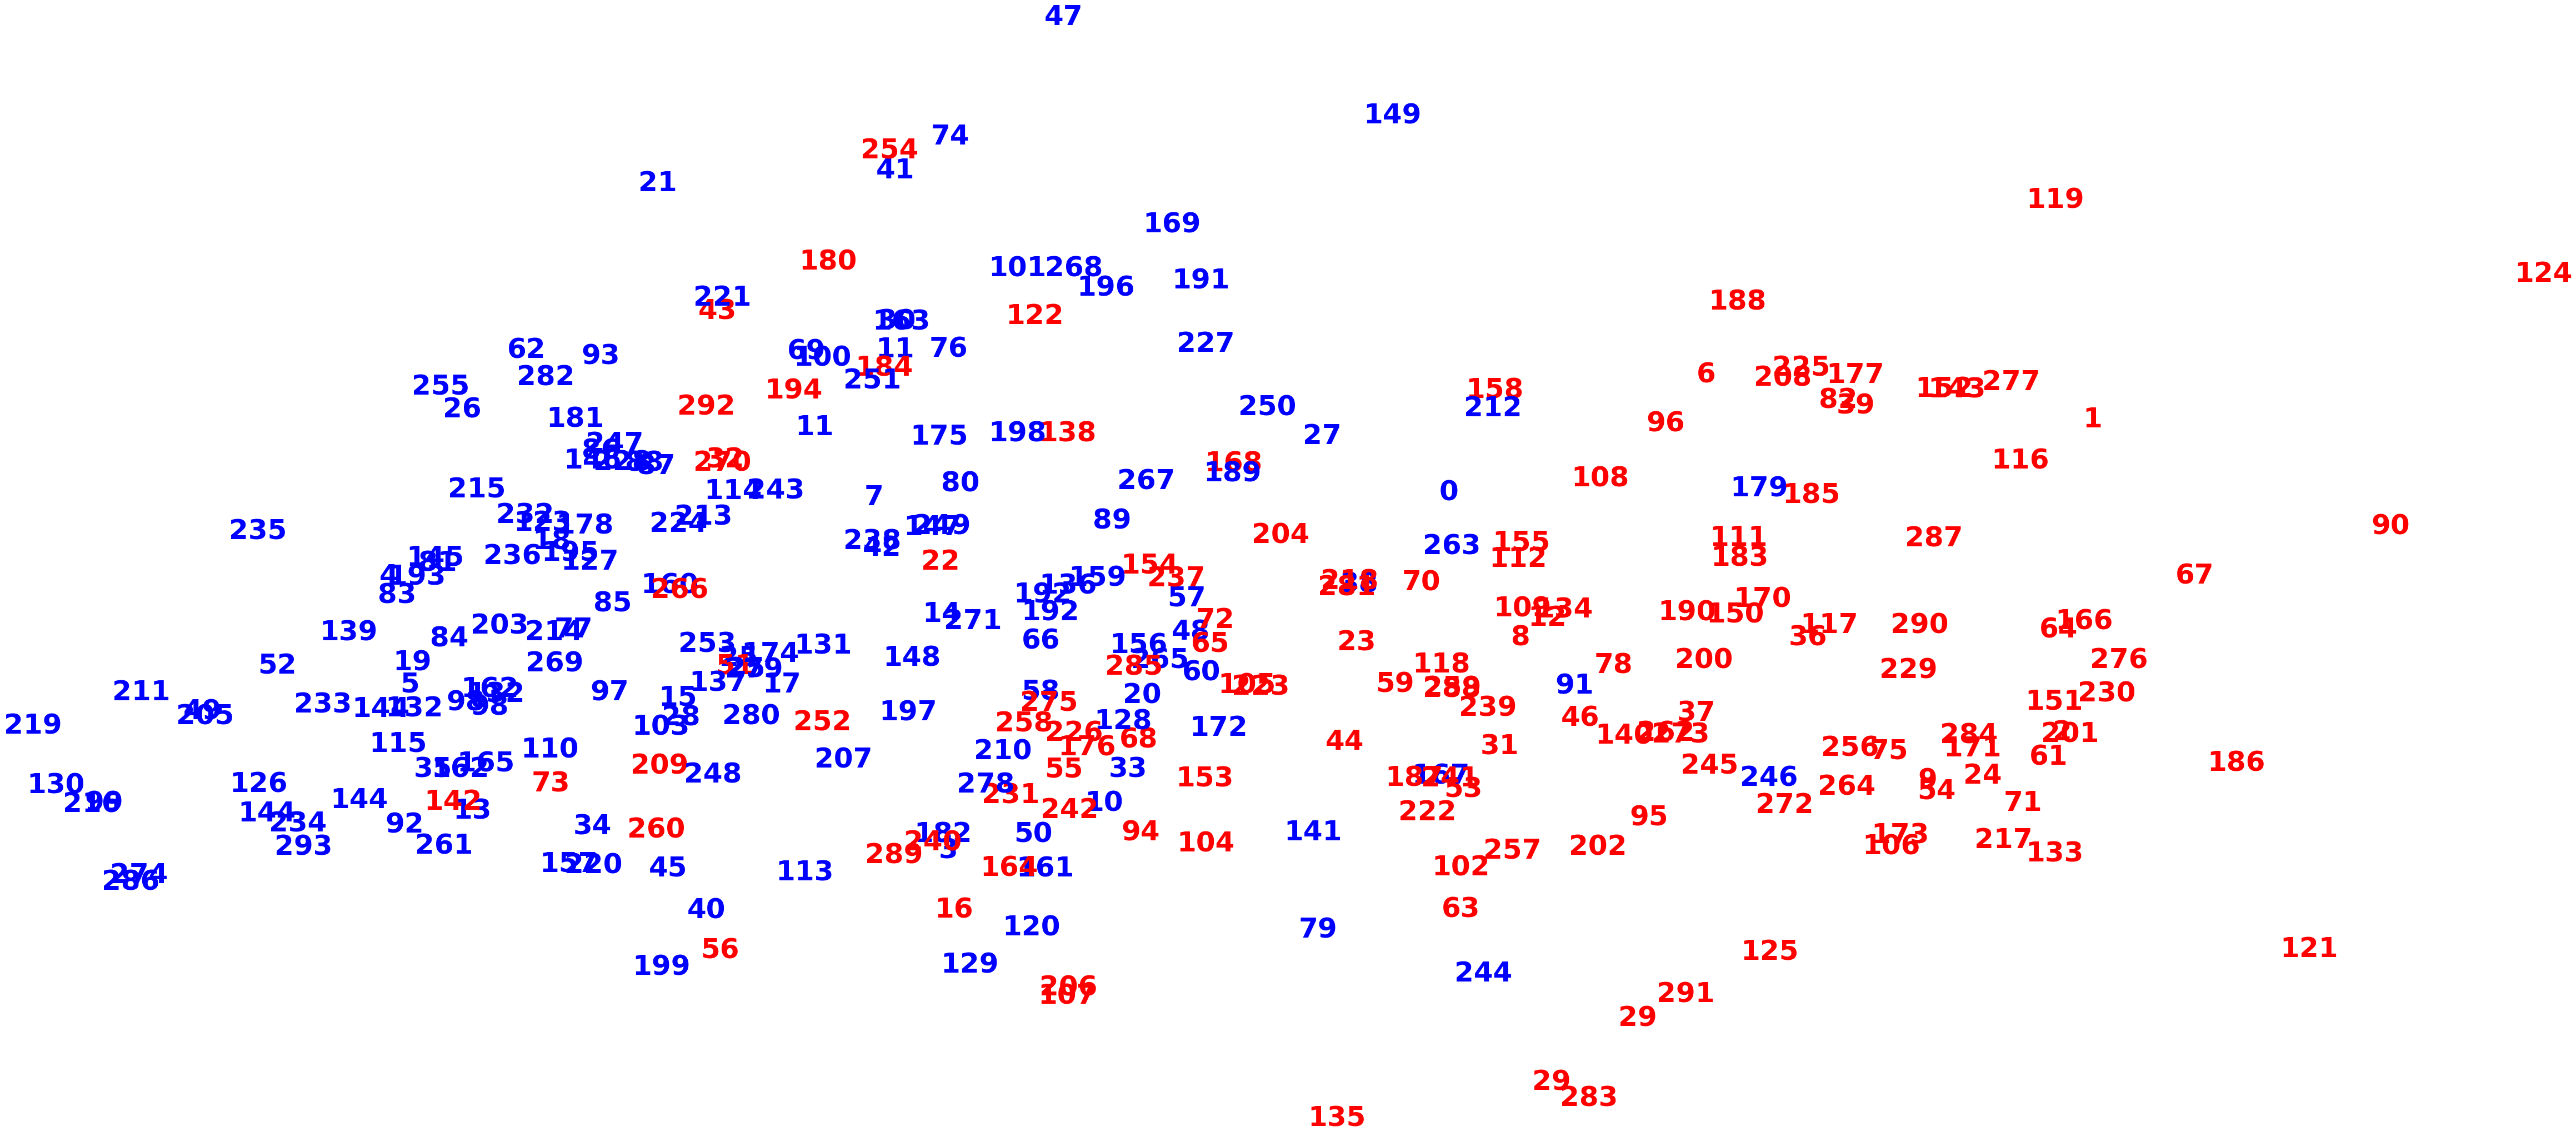

In [4]:
from sklearn.cluster import DBSCAN

# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgrg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

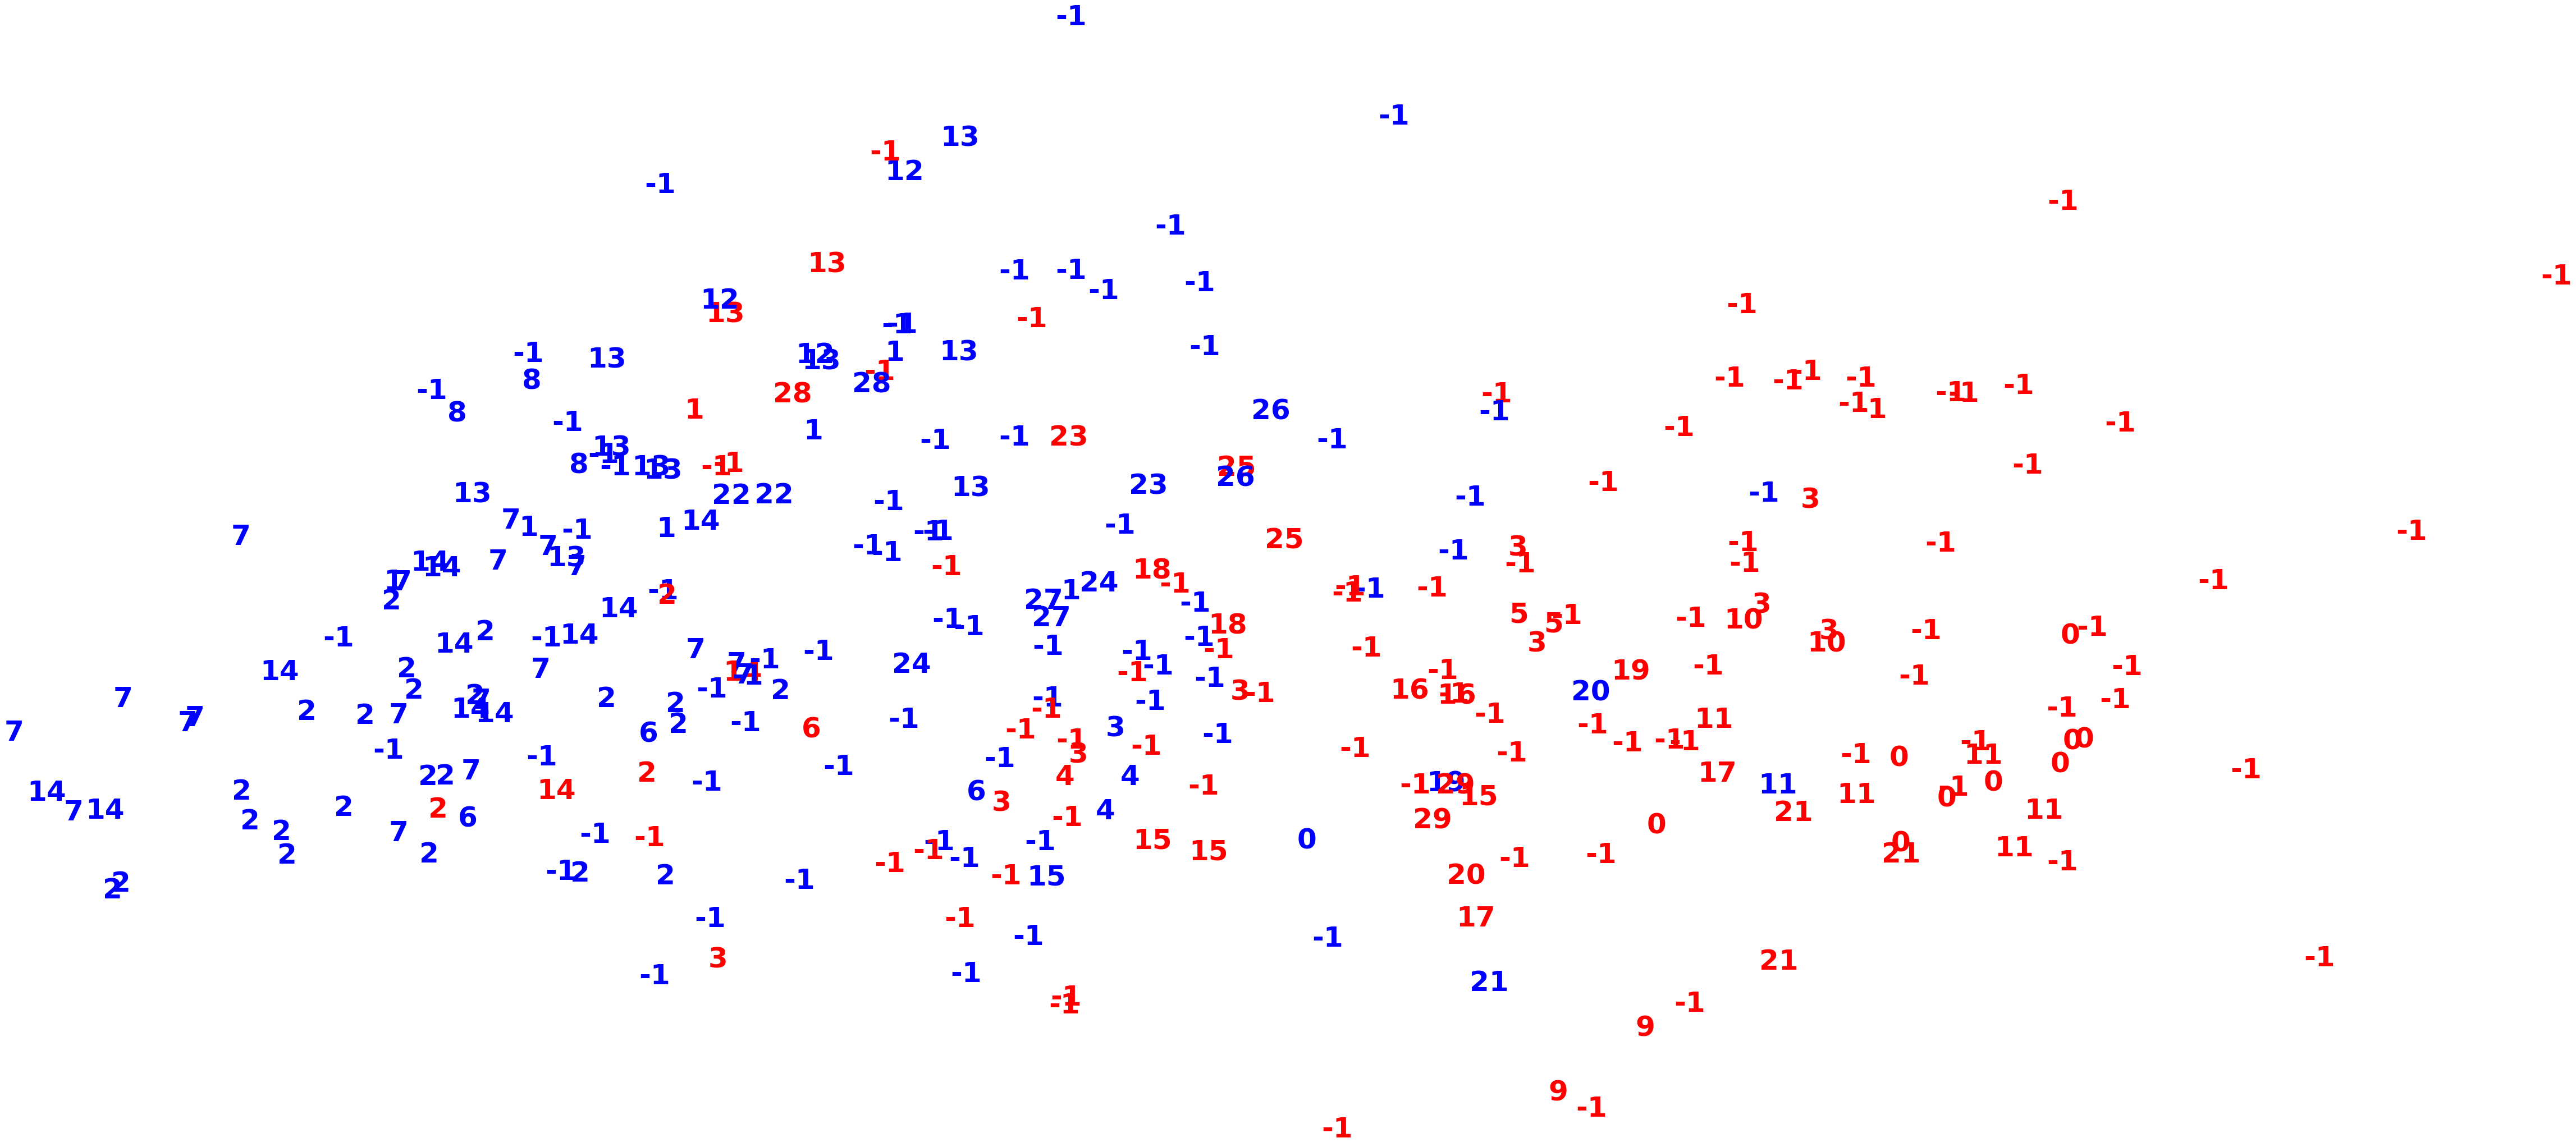

In [5]:
dbscan_cluster = DBSCAN(eps=2, min_samples=2, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgrg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

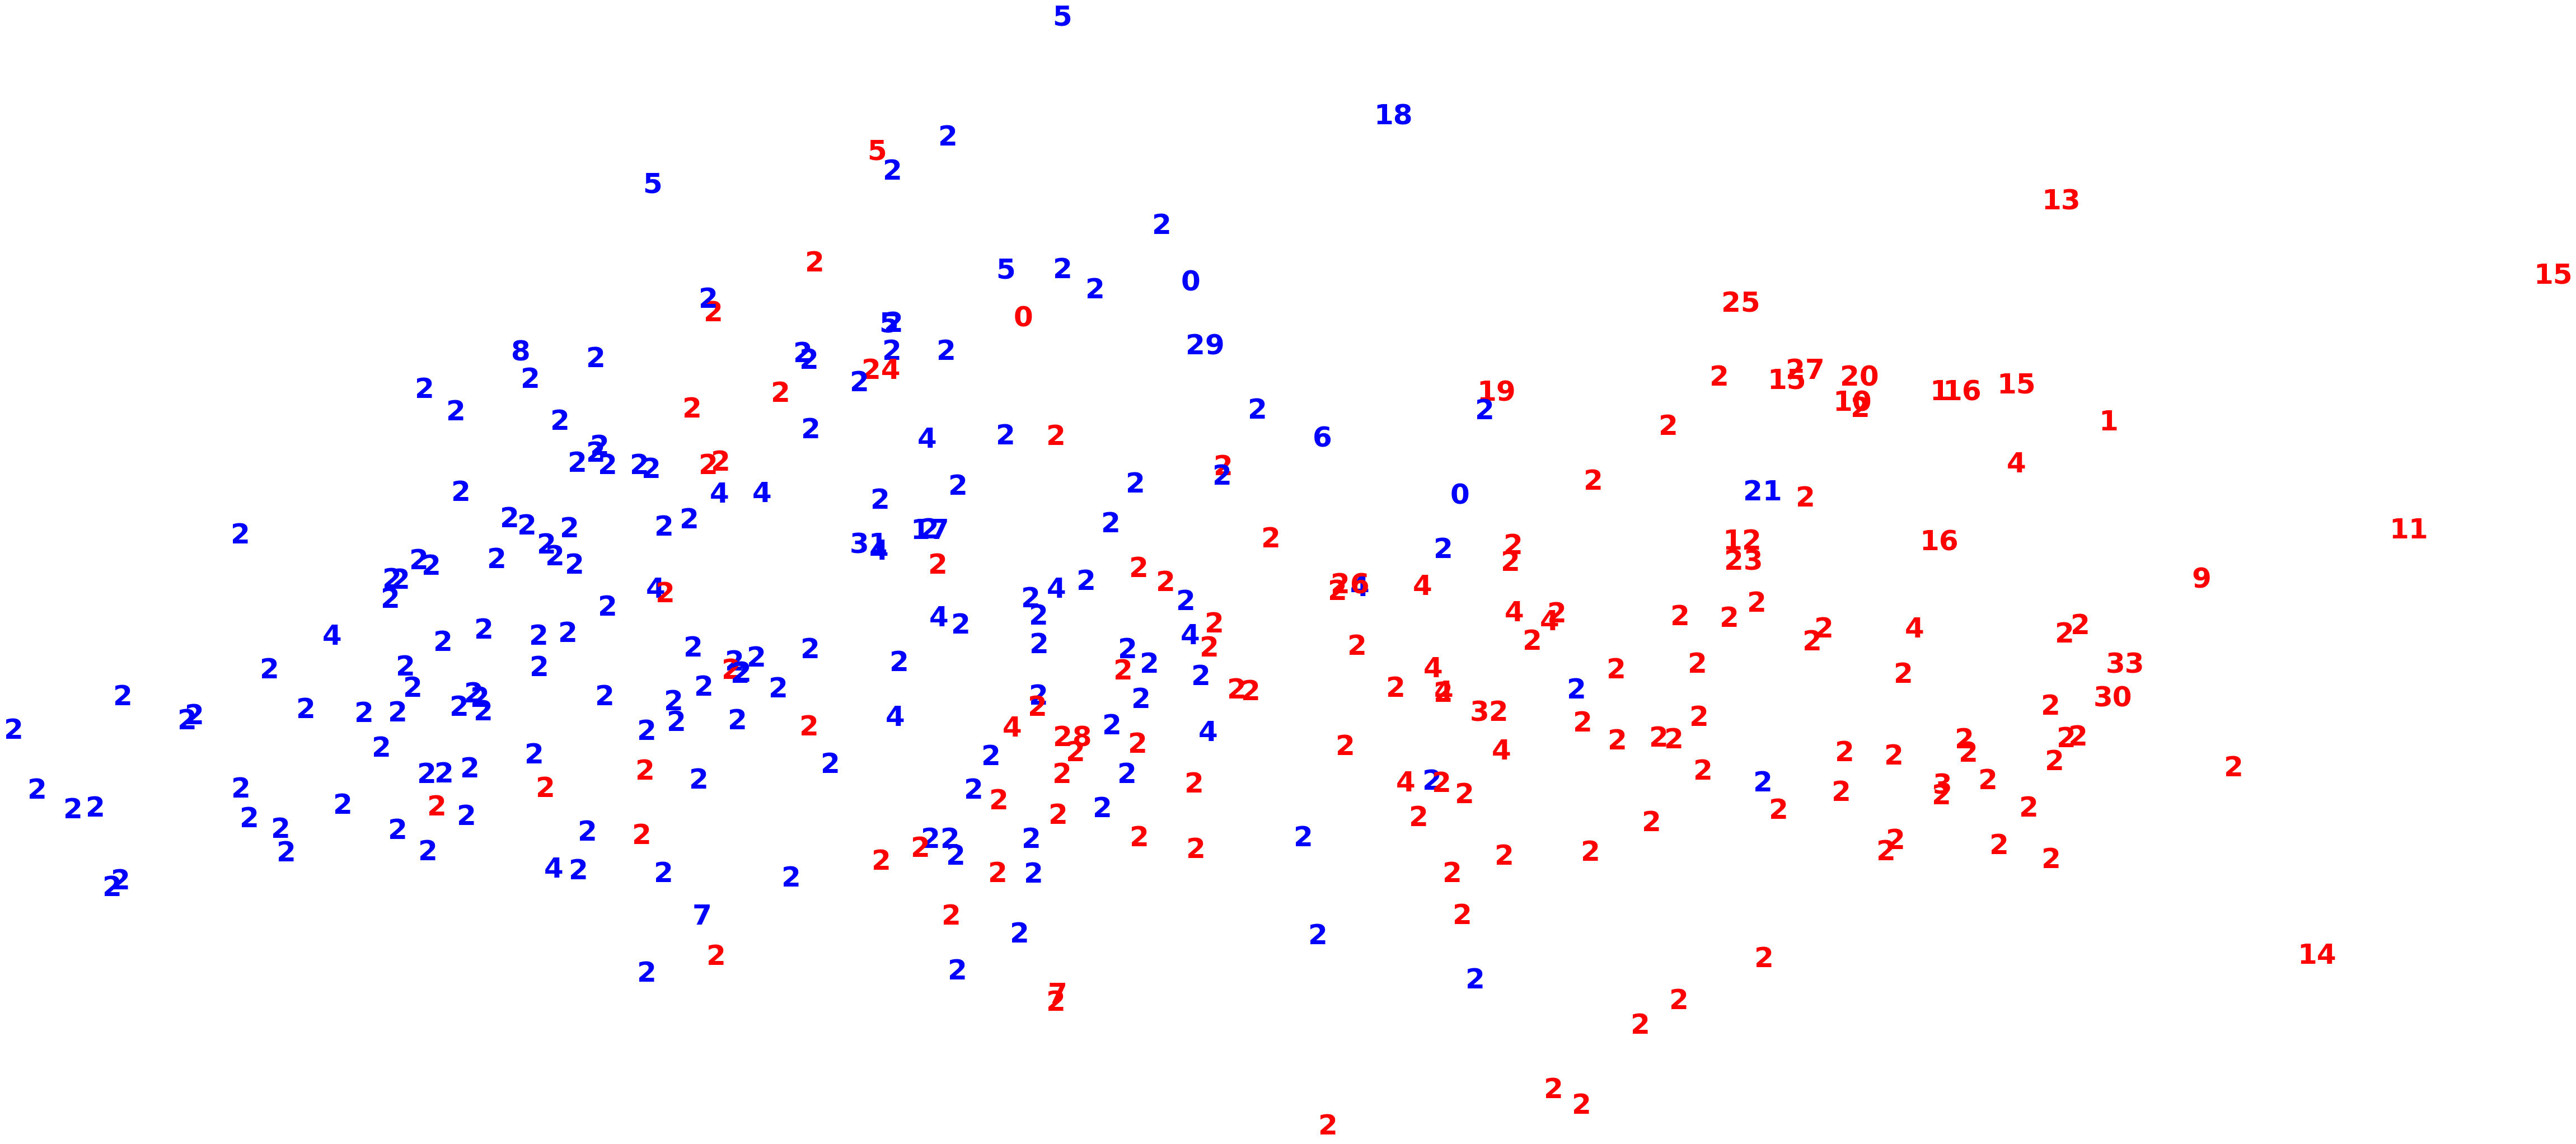

In [6]:
dbscan_cluster = DBSCAN(eps=3, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgrg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

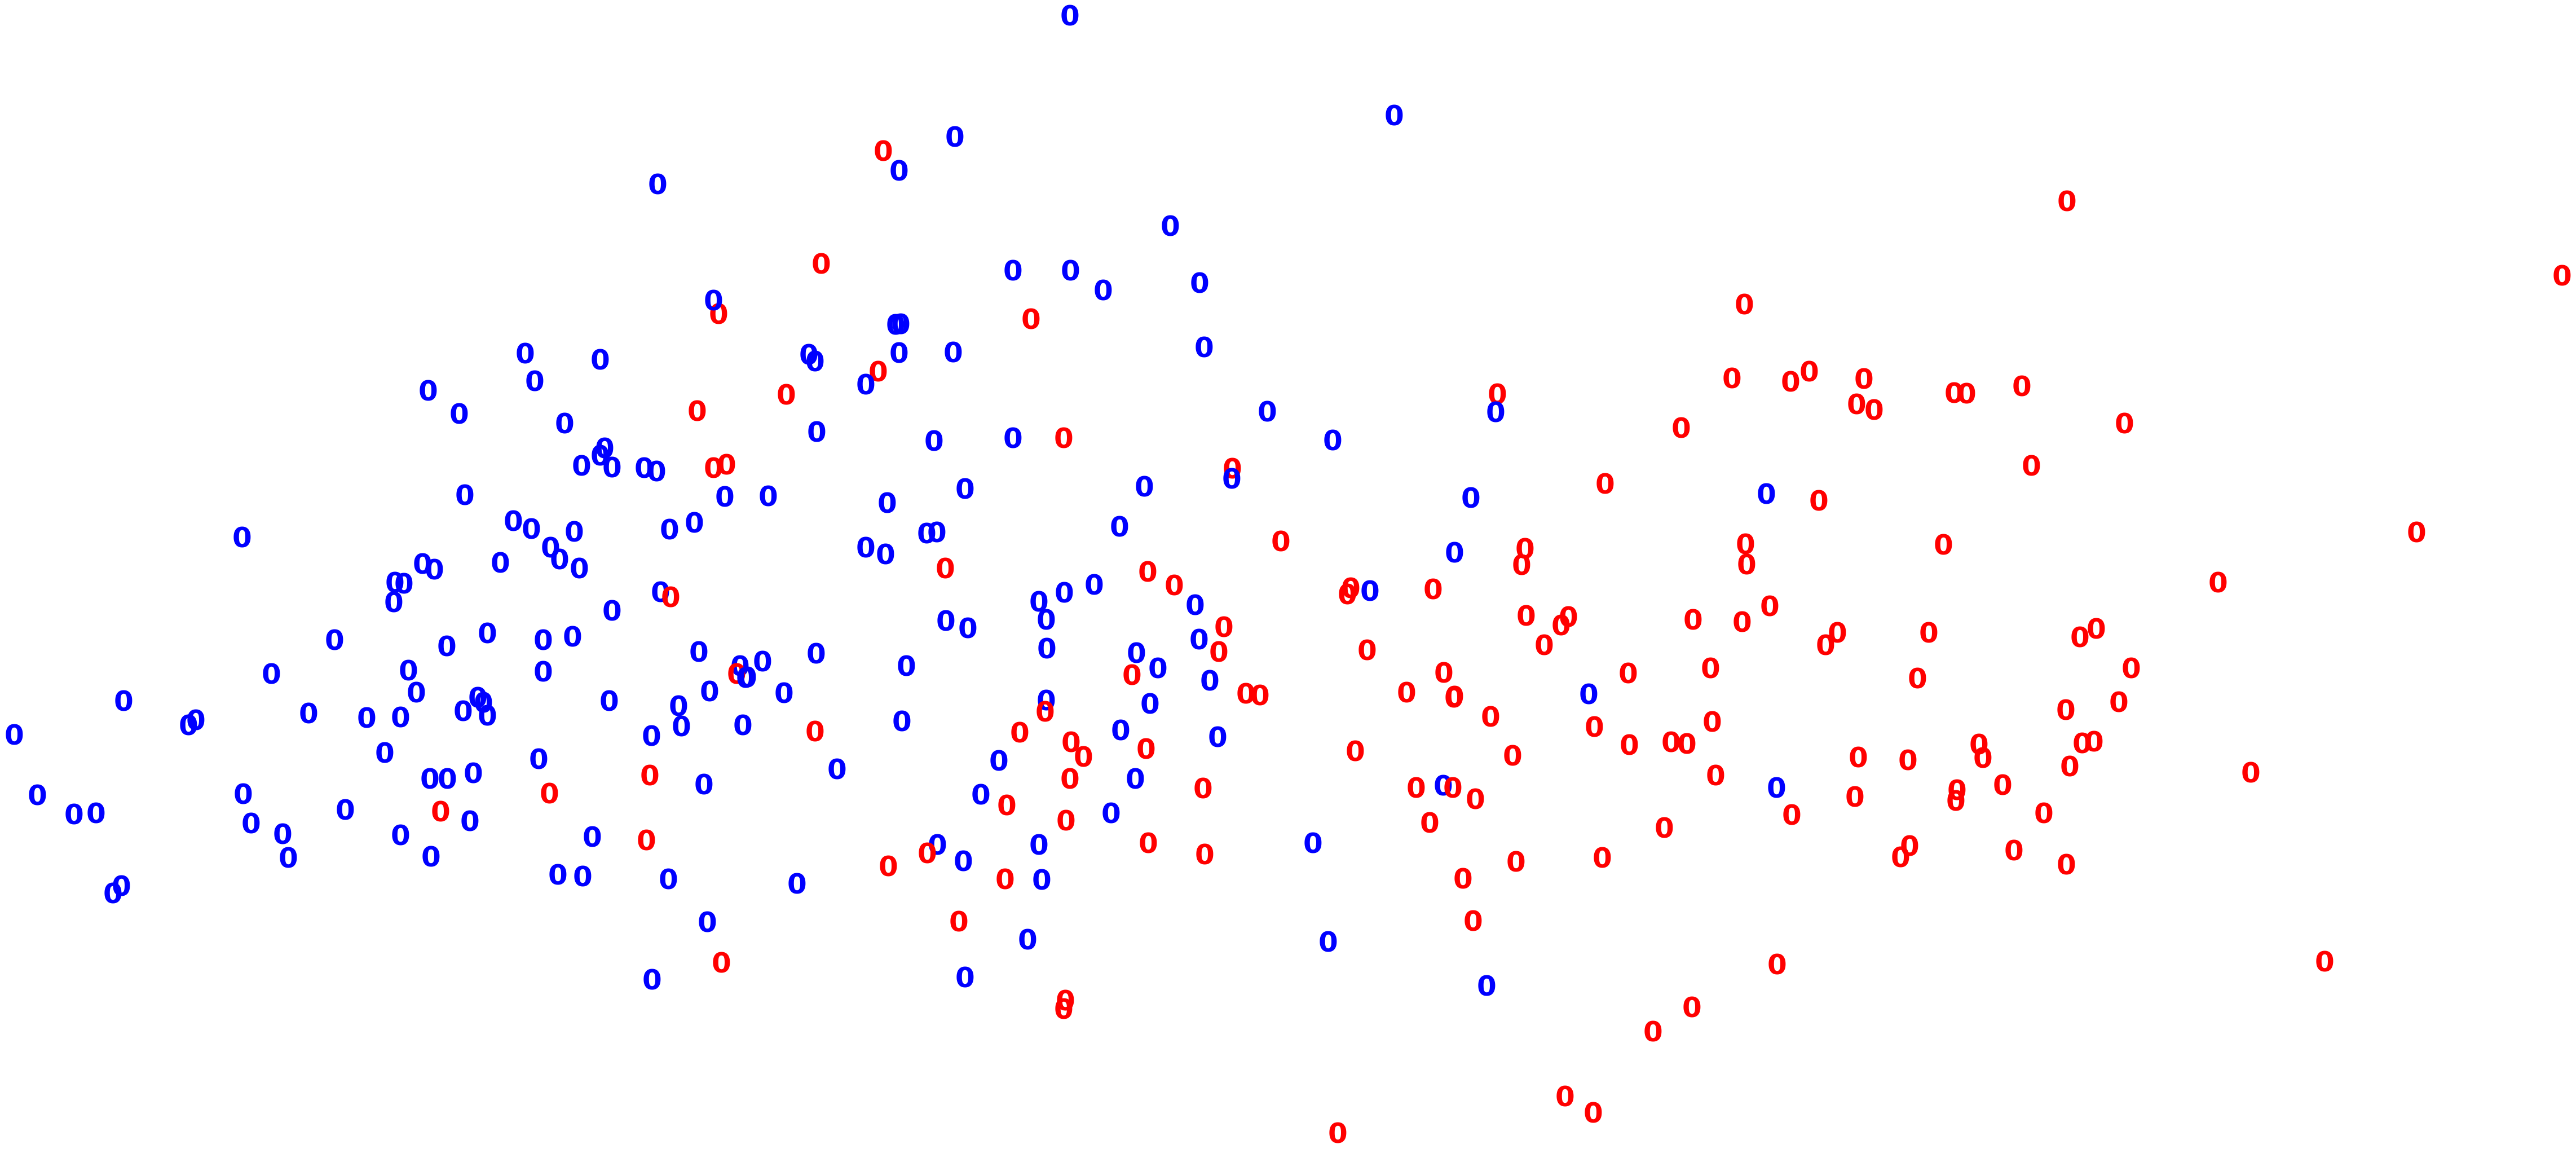

In [7]:
dbscan_cluster = DBSCAN(eps=5, min_samples=3, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgrg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

---

In [10]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,26)

for i in range(2,26):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

clusters when min_samples=1 is: 294
clusters when min_samples=2 is: 9
clusters when min_samples=3 is: 2
clusters when min_samples=4 is: 1
clusters when min_samples=5 is: 1
clusters when min_samples=6 is: 1
clusters when min_samples=7 is: 1
clusters when min_samples=8 is: 1
clusters when min_samples=9 is: 1
clusters when min_samples=10 is: 1
clusters when min_samples=11 is: 1
clusters when min_samples=12 is: 1
clusters when min_samples=13 is: 1
clusters when min_samples=14 is: 1
clusters when min_samples=15 is: 1
clusters when min_samples=16 is: 1
clusters when min_samples=17 is: 1
clusters when min_samples=18 is: 1
clusters when min_samples=19 is: 1
clusters when min_samples=20 is: 1
clusters when min_samples=21 is: 1
clusters when min_samples=22 is: 1
clusters when min_samples=23 is: 1
clusters when min_samples=24 is: 1
clusters when min_samples=25 is: 1


As min_samples increases, clusters decreases.

---

In [13]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,26)

for i in range(1,16):
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("clusters when epsilon={} is: {}".format(i, len(np.unique(clusters))))

clusters when eps=1 is: 294
clusters when epsilon=1 is: 294
clusters when epsilon=2 is: 178
clusters when epsilon=3 is: 34
clusters when epsilon=4 is: 3
clusters when epsilon=5 is: 1
clusters when epsilon=6 is: 1
clusters when epsilon=7 is: 1
clusters when epsilon=8 is: 1
clusters when epsilon=9 is: 1
clusters when epsilon=10 is: 1
clusters when epsilon=11 is: 1
clusters when epsilon=12 is: 1
clusters when epsilon=13 is: 1
clusters when epsilon=14 is: 1
clusters when epsilon=15 is: 1


As epsilon increases, clusters decrease.